In [1]:
from ops import deblur, denoise
from numpy import genfromtxt
import utils
from utils import misc_utils
import numpy as np

from utils import inverse_fourier_transform as ift
from utils import discrete_fourier_transform as dft

In [2]:
data = genfromtxt('data.csv', delimiter=',')

x = data[1:, 0]
y = data[1:, 1]
h = np.array([1/16, 4/16, 6/16, 4/16, 1/16])

In [3]:
import matplotlib.pyplot as plt

In [4]:
dft_h = dft(h)

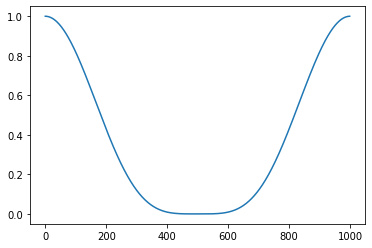

In [5]:
plt.plot(np.abs(dft_h))
plt.show()

In [6]:
dft_y = dft(y)

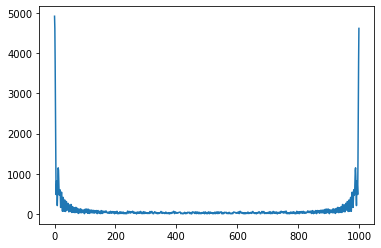

In [7]:
plt.plot(np.abs(dft_y))
plt.show()

In [8]:
shifted_dft_h = dft_h * np.exp(4j*np.pi*np.arange(1000)/1000)

In [9]:
shifted_dft_h_magnitude = np.abs(shifted_dft_h)

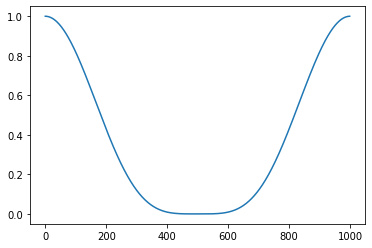

In [10]:
plt.plot(shifted_dft_h_magnitude)
plt.show()

In [11]:
np.allclose(dft_h, shifted_dft_h)

False

In [12]:
dft_x = dft(x)
dft_x_magnitude = np.abs(dft_x)

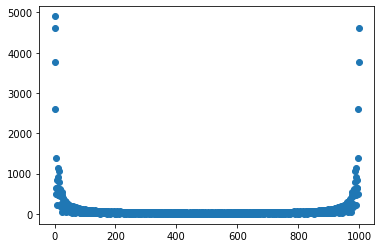

In [13]:

plt.scatter(np.arange(0,1000),np.abs(dft_x))
plt.show()

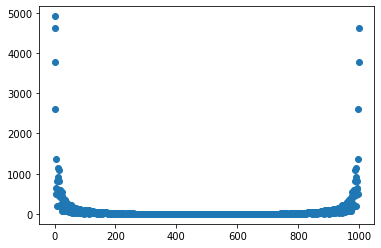

In [14]:
plt.scatter(np.arange(0,1000), np.abs(shifted_dft_h * dft_y))
plt.show()

In [15]:
x_hat = utils.conv1d(y, h)

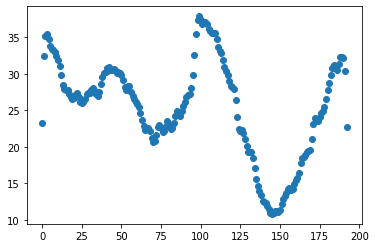

In [16]:
plt.scatter(np.arange(193), x_hat)

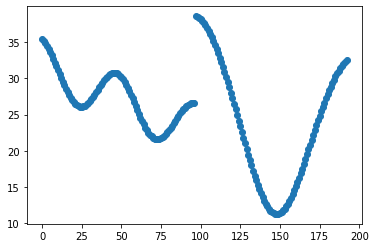

In [17]:
plt.scatter(np.arange(193), x)

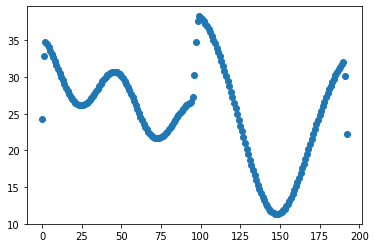

In [18]:
blurred_x = utils.conv1d(x, h)
plt.scatter(np.arange(193), blurred_x)

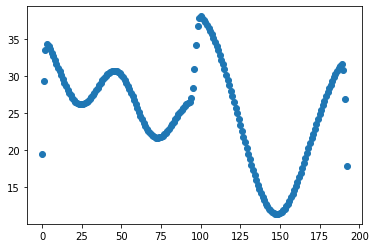

In [19]:
x_blurred_twice = utils.conv1d(blurred_x, h)
plt.scatter(np.arange(193), x_blurred_twice)

In [26]:
th_dft_x = dft_y * dft_h

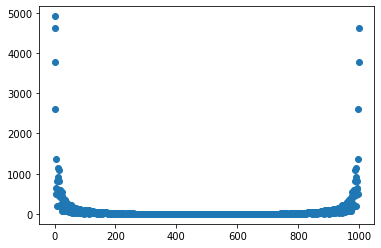

In [27]:
plt.scatter(np.arange(1000), np.abs(th_dft_x))

In [28]:
noise = y - utils.conv1d(x, h)

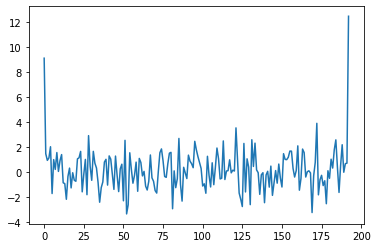

In [29]:
plt.plot(noise)